Introduction Marketing: Proses pada perusahaan untuk menciptakan nilai bagi pelanggan dan membangun hubungan yang kuat serta menangkap nilai imbalannya


Marketing campaigns (Kampanye marketing):
berfokus pada kebutuhan customer dan semua kepuasan mereka. Namun demikian, terdapat perbedaan variabel-variabel yang menentukan apakah kempanye marketing tersebut akan sukses atau tidak. Terdapat variable tertentu yang perlu kita pertimbangankan Ketika membuat kampanye marketing


Term deposit (deposito berjangka):
deposito yang ditawarkan oleh bank atau Lembaga keuangan dengan suku bunga tetap, dimana uang tersebut akan dikembalikan pada waktu jatuh tempo tertentu


**Tujuan**: Menentukan kelompok antara populasi sampel yang berpotensi besar membuka rekening deposit berjangka menggunakan machine learning

Variabel data nasabah bank:

*   age (usia)
*   job (pekerjaan)
*   marital (status pernikahan)
*   education (Pendidikan)
*   default (memiliki credit secara default?)
*   housing (memiliki pinjaman perumahan?)
*   loan (memiliki peminjaman pribadi?)
*   balance (keseimbangan individual)
*   contact
*   month (kontak bulan terakhir)
*   day (kontak hari terakhir)
*   duration (durasi kontak terakhir dalam detik)
*   campaign (jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini)
*   previous (jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini)
*   poutcome (hasil dari kampanye marketing sebelumnya)
*   y (apakah klien telah berlangganan deposito berjangka?)


# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/new_train.csv')

df.rename(columns={'y': 'subscribe'}, inplace=True)

In [ ]:
#df.sample(n=100, replace=True, random_state=42)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  subscribe    32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


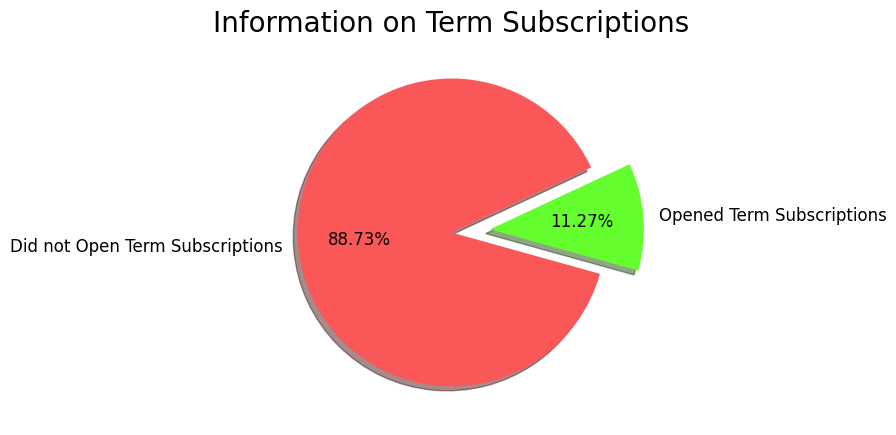

In [ ]:
# Pie chart of term subscriptions
plt.figure(figsize=(5, 5))
colors = ["#FA5858", "#64FE2E"]
labels = ["Did not Open Term Subscriptions", "Opened Term Subscriptions"]
plt.title('Information on Term Subscriptions', fontsize=20)

df["subscribe"].value_counts().plot.pie(explode=[0, 0.25], autopct='%1.2f%%', shadow=True, colors=colors,
                                labels=labels, fontsize=12, startangle=25)

plt.ylabel('', fontsize=14)
plt.show()

Berdasarkan visualisasi dengan pie chart dapat dilihat bahwa terdapat ketimpangan antara kelas yang menolak sebanyak 88,73% dengan kelas menerima sebanyak 11,27%

#Exploration Data Analysis and Preprocessing Data

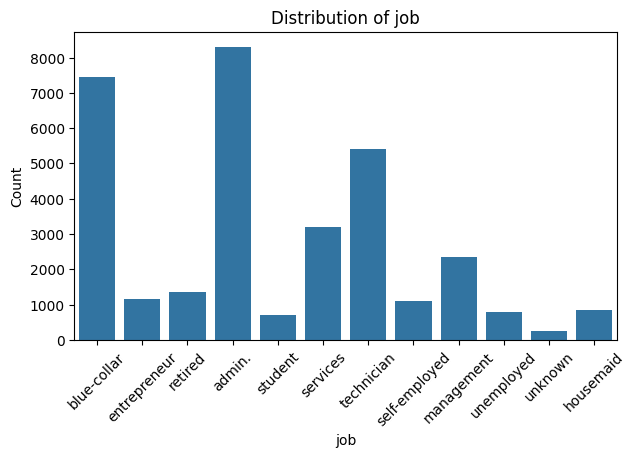

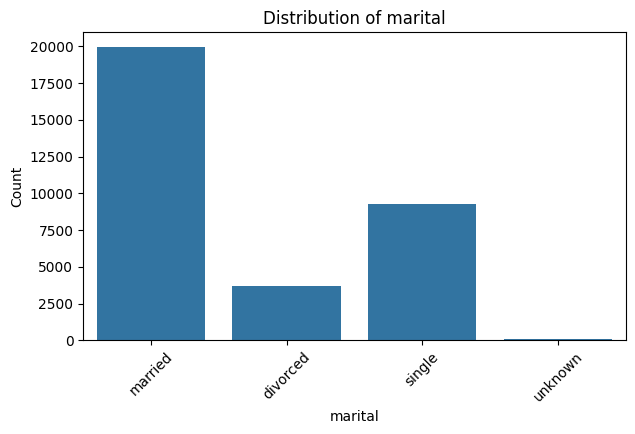

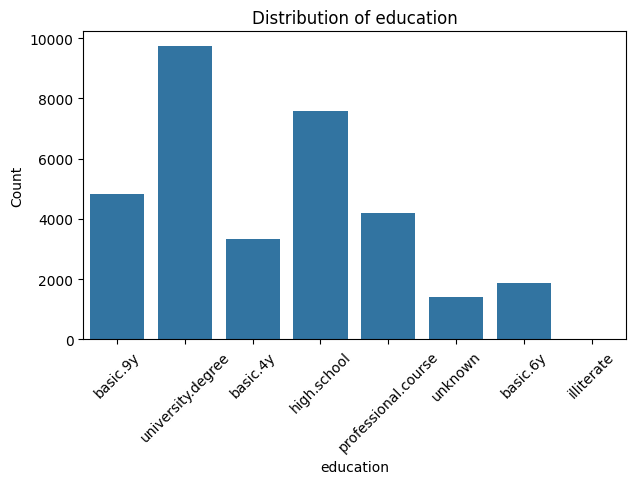

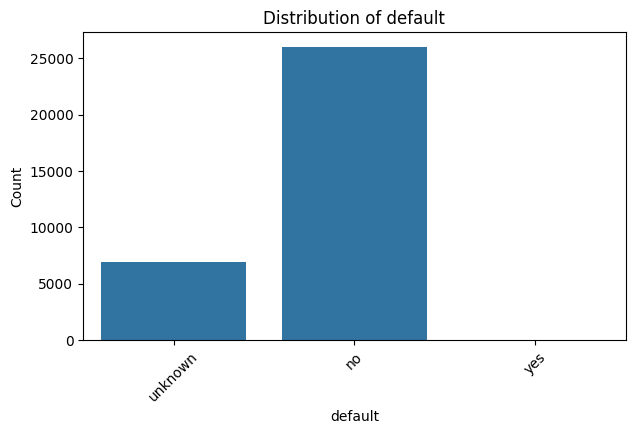

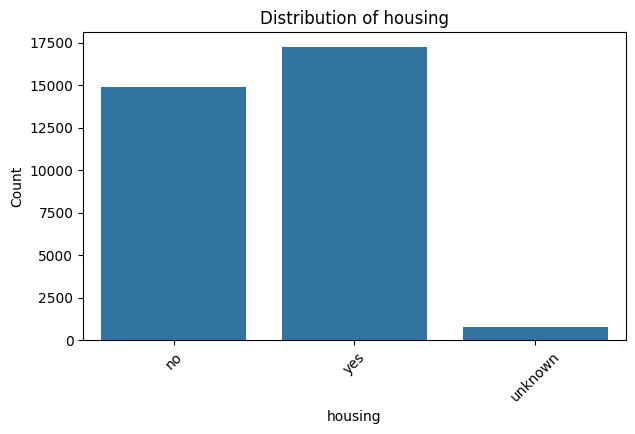

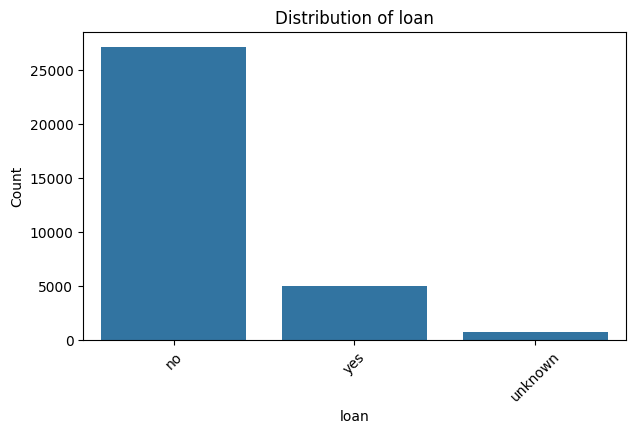

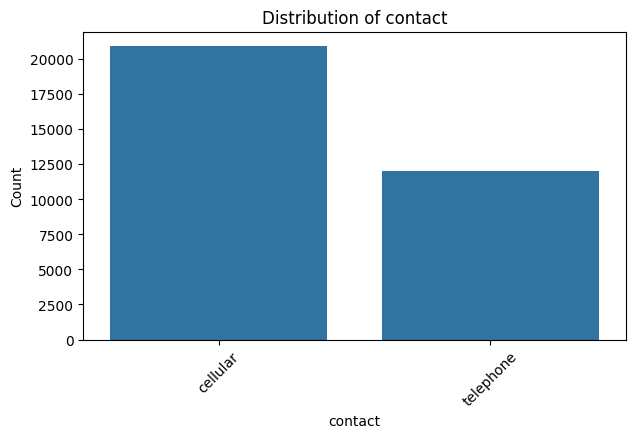

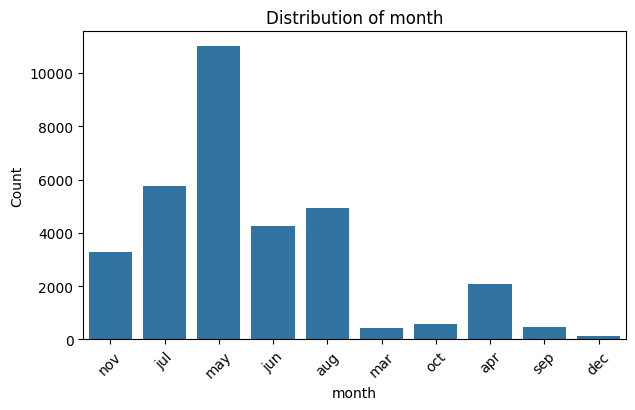

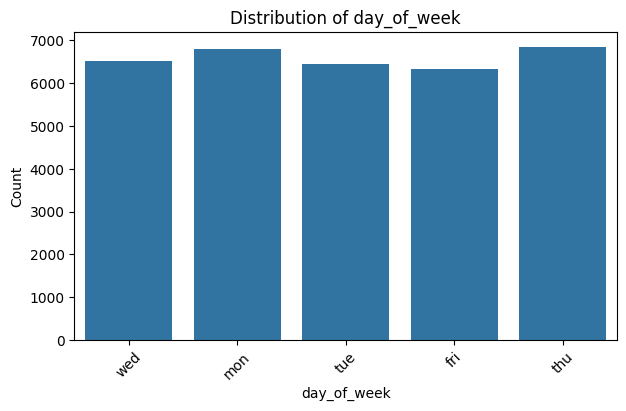

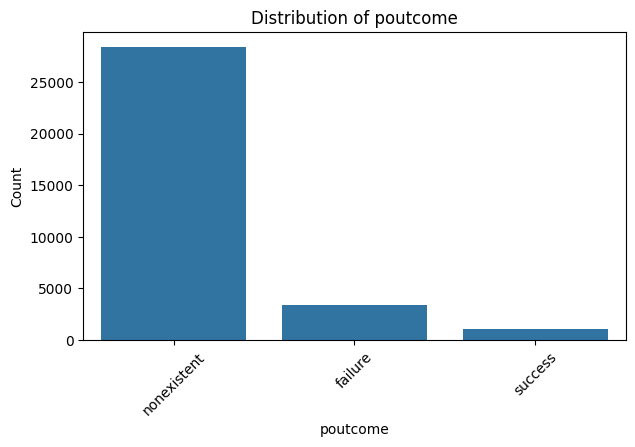

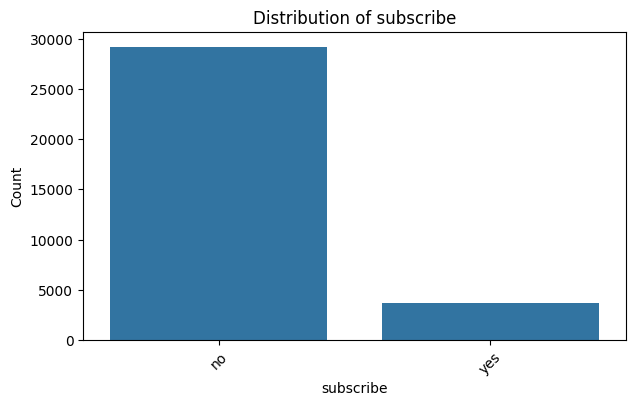

In [ ]:
# Distribusi variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

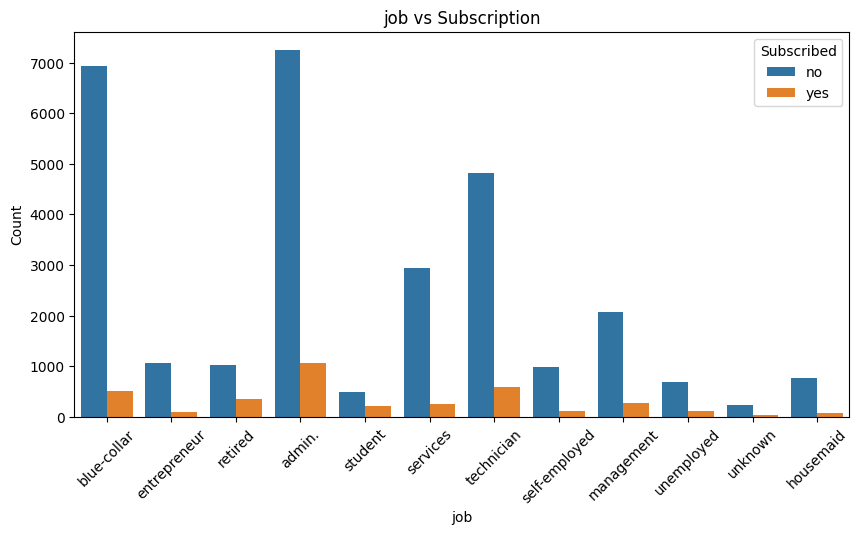

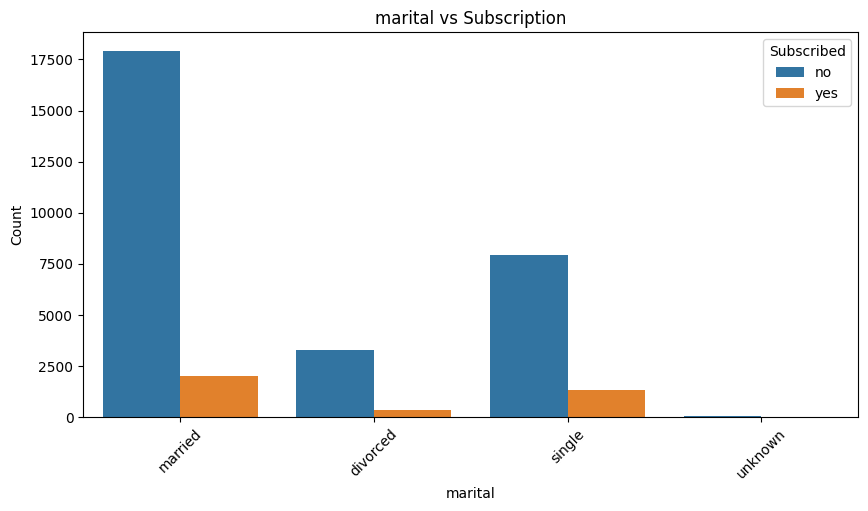

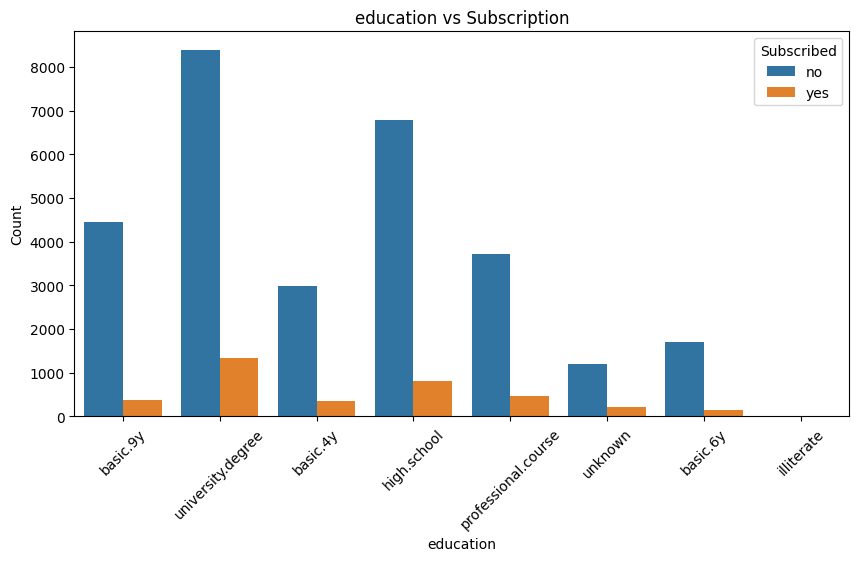

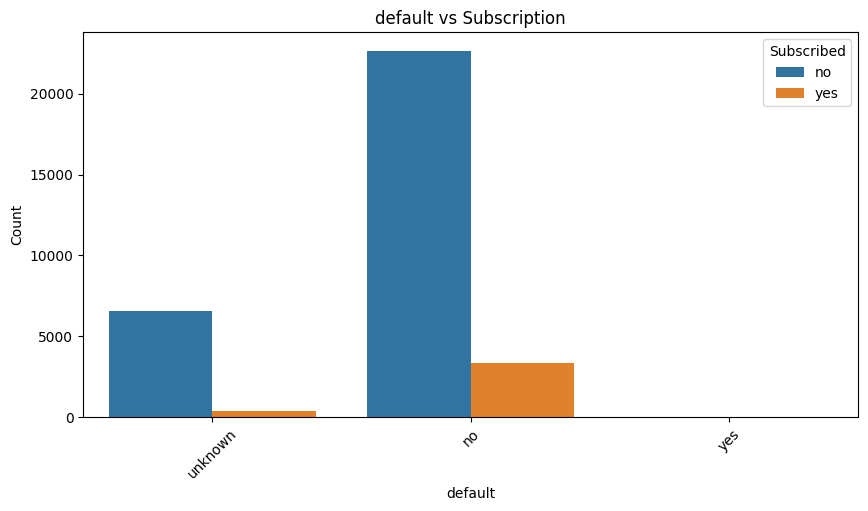

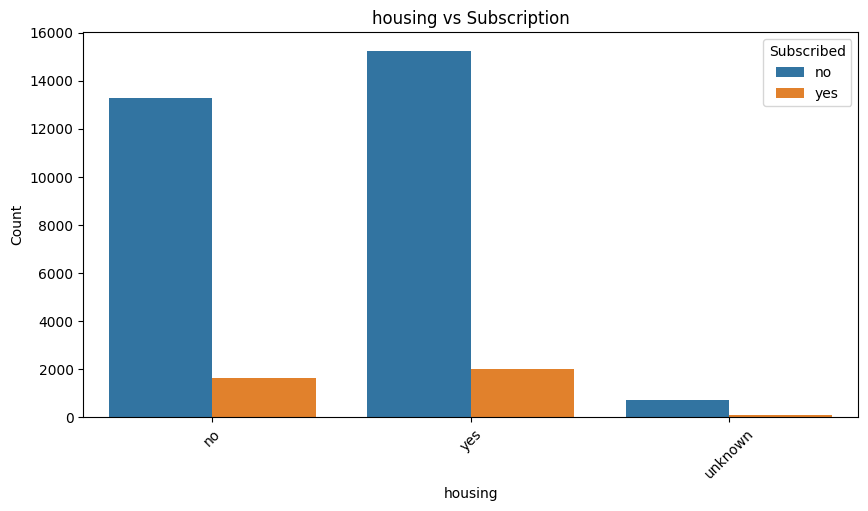

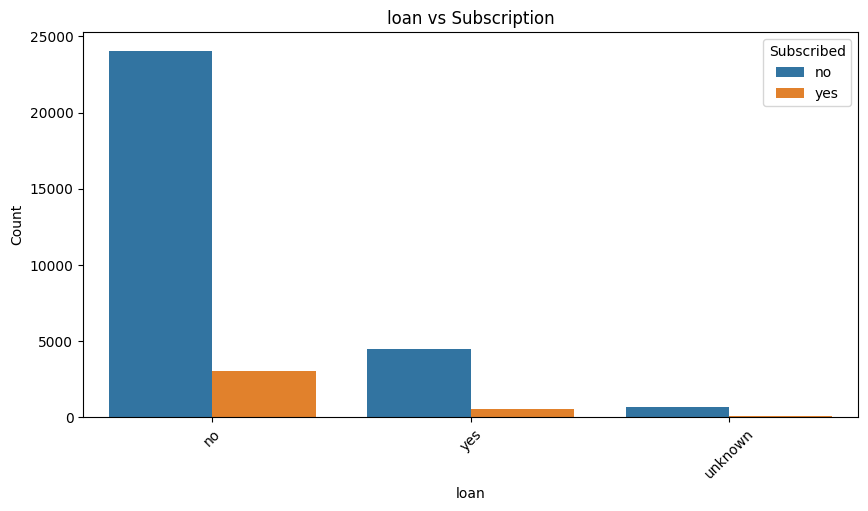

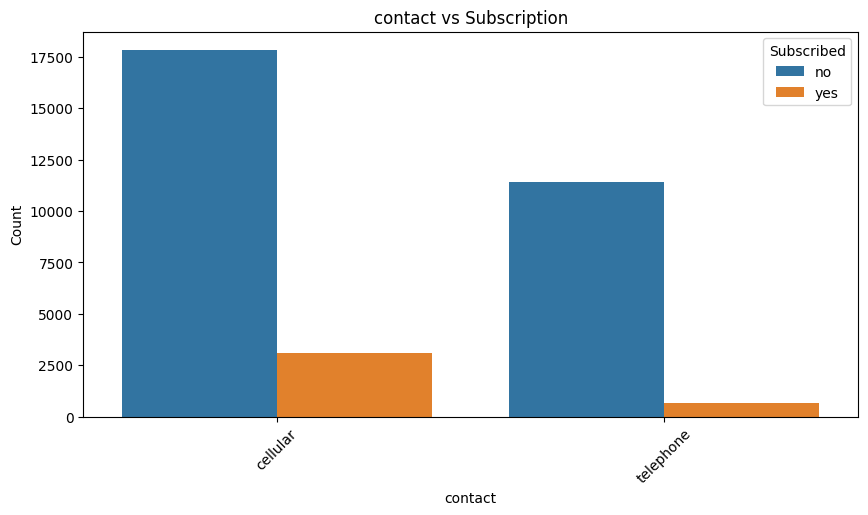

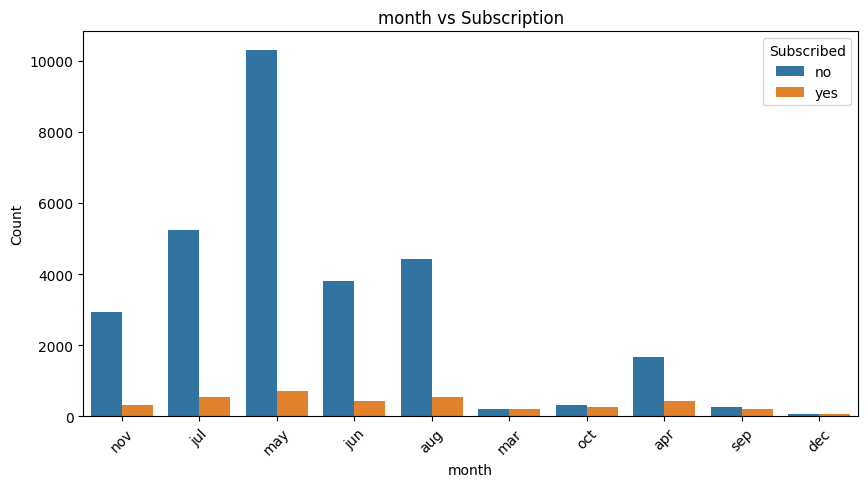

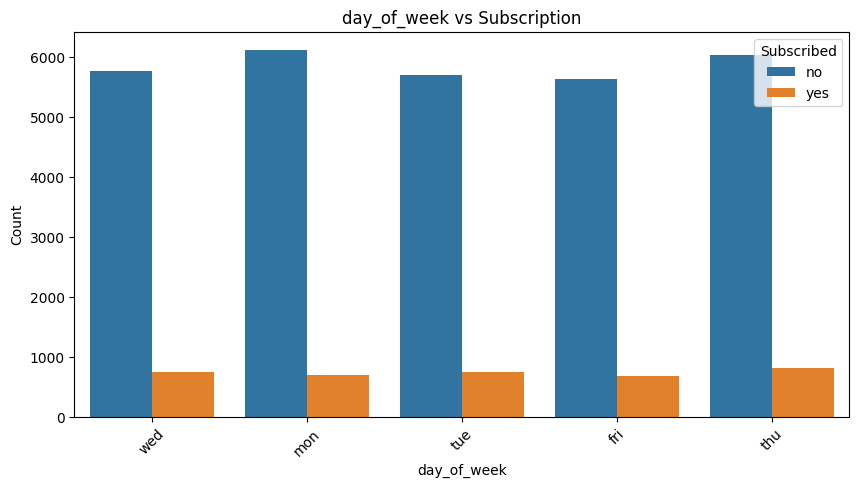

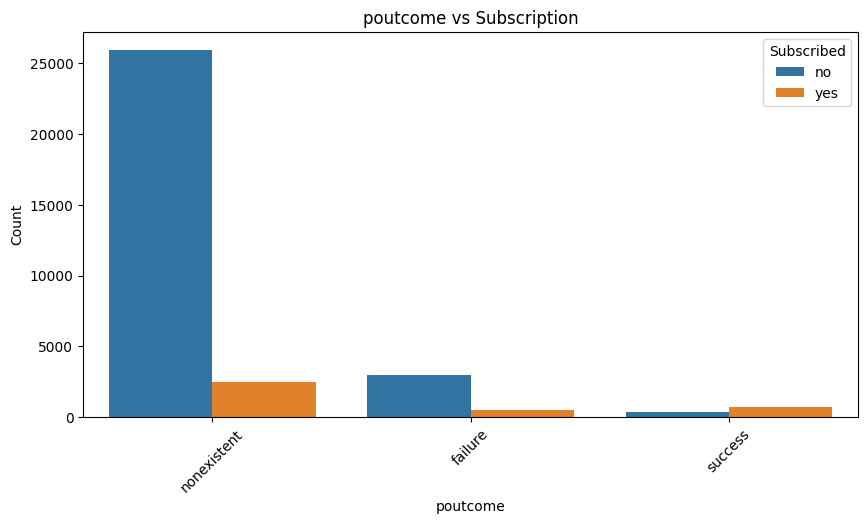

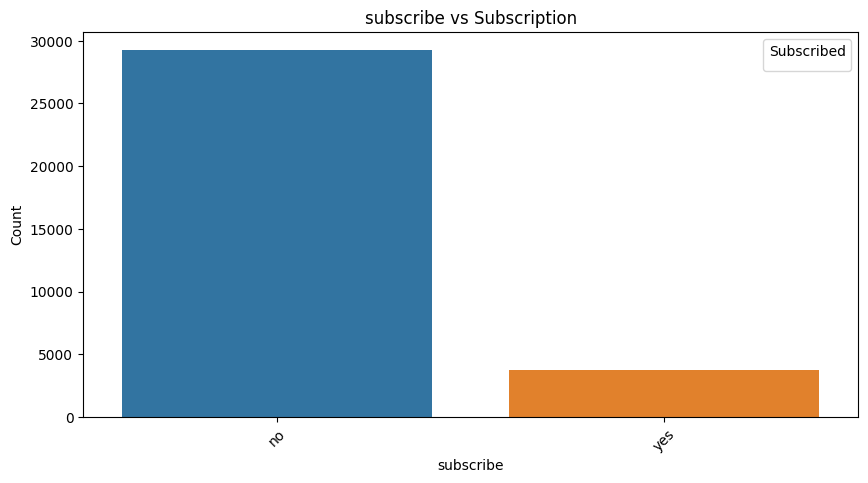

In [ ]:
# Hubungan antara variabel kategorikal dan kolom target
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='subscribe', data=df)
    plt.title(f'{col} vs Subscription')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed')
    plt.show()

**Resume Analysis Variabel pada Nasabah Bank:**

*   Nasabah bank dengan pekerjaan (job) paling banyak adalah sebagai admin
*   Nasabah bank dengan status perkawinan (marital) paling banyak adalah berstatus married
*   Nasabah bank dengan pendidikan (education) paling banyak adalah lulusan university degree
*   Nasabah bank dengan default paling banyak adalah no
*   Nasabah bank yang memiliki pinjaman rumah paling banyak dibandingkan dengan yang tidak
*   Nasabah bank yang tidak memiliki pinjaman pribadi paling banyak dibandingkan dengan yang memiliki pinjaman pribadi
*   Bank melakukan kontak yang dilakukan dengan cellular paling banyak pada nasabah bank
*   Bank melakukan kontak terakhir paling banyak ada pada bulan mei
*   Bank melakukan kontak pada nasabah pada hari senin, selasa, rabu, kamis, jumat memiliki jumlah yang hampir sama
*   Bank melakukan kampanye sebelumnya (poutcome) dengan hasil yaitu lebih banyak yang gagal dibandingkan yang sukses, selebihnya tidak ada (nonexixtent)


**Resume Analysis Variabel Nasabah Bank terhadap kelasnya:**

*   Nasabah bank dengan pekerjaan admin dan blue-collar paling banyak untuk menolak (no) dibandingkan menerima (yes) untuk deposit berjangka
*   Nasabah bank dengan status yang menikah (married) paling banyak menolak (no) untuk deposit berjangka
*   Nasabah bank dengan tingkat pendidikan university degree paling banyak untuk menolak untuk deposit berjangka
*   Nasabah bank dengan tanggungan pinjaman pribadi lebih banyak untuk menolak untuk deposit berjangka
*   Bank Menghubungi nasabah menggunakan cellular lebih banyak menolak untuk deposito berjangka dibandingkan menggunakan telephone



<ipython-input-107-a7ac8856dadc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='subscribe', y='duration', data=df, ci=None)


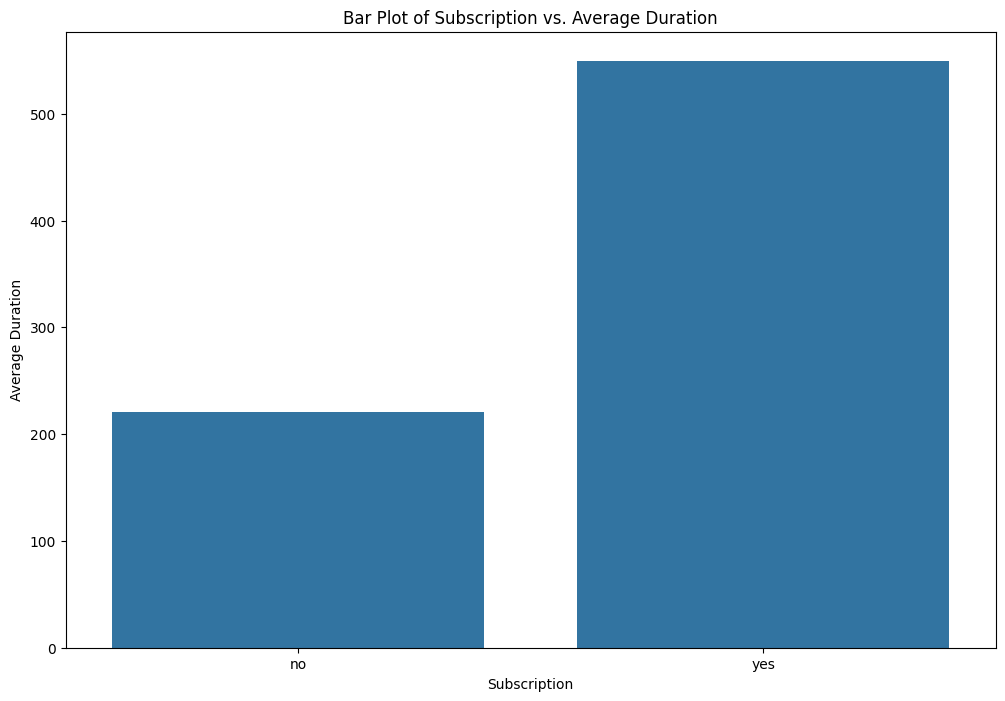

In [ ]:
# Bar plot untuk hubungan antara 'subscibe' dan 'duration' (rata-rata durasi)
plt.figure(figsize=(12, 8))
sns.barplot(x='subscribe', y='duration', data=df, ci=None)
plt.title('Bar Plot of Subscription vs. Average Duration')
plt.xlabel('Subscription')
plt.ylabel('Average Duration')
plt.show()

Nasabah bank memutuskan untuk mengambil deposito berjangka dengan rata-rata durasi melakukan waktu kontak lebih lama dibandingkan dengan durasi melakukan waktu kontak lebih singkat.

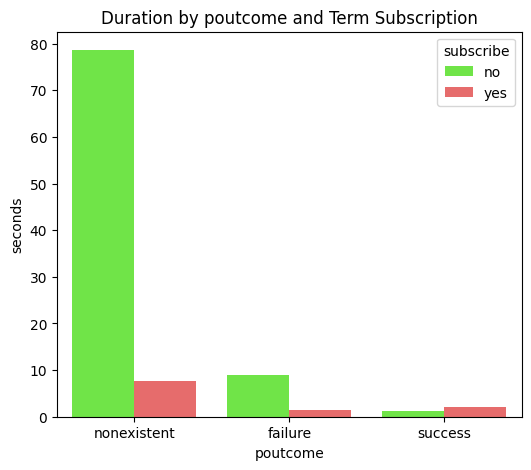

In [ ]:
# Bar plot of duration by education and term subscription
plt.figure(figsize=(6, 5))
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="poutcome", y="duration", hue="subscribe", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel("seconds")
plt.xlabel("poutcome")
plt.title('Duration by poutcome and Term Subscription')
plt.show()

Pada kegagalan kampanye sebelumnya nasabah bank dengan durasi kontaknya semakin lama memutuskan untuk tidak mengambil deposito berjangka dibandingkan dengan yang durasi kontak yang singkat. Sedangkan keberhasilan kampanye marketing sebelumnya dengan durasi kontaknya lebih singkat memutuskan untuk tidak mengambil deposito berjangka dibandingkan dengan durasi kontaknya yang lama.

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat instance LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Memeriksa hasil encoding
print(df.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        1        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   78    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        2     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  pdays  previous  poutcome  subscribe  
0            4       227         4    999         0         1          0  
1            4       202         2    999         1         0          0  
2            1      1148         1    999         0         1          1  
3            1       120         2    999         0         1          0  
4            3       368         2    999         0         1          0  


# Correlation Matrix

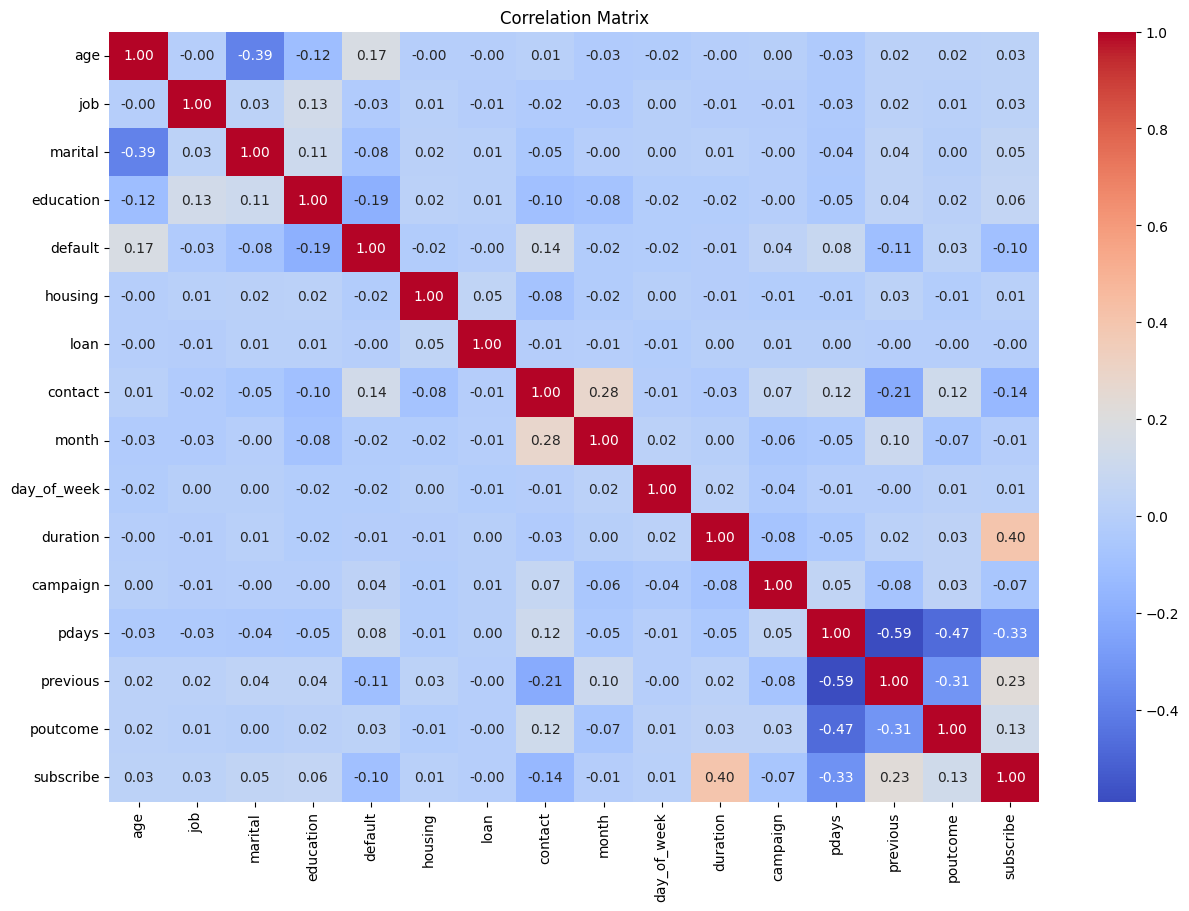

In [ ]:
# Analisis Hubungan Antar Variabel
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Berdasarkan matriks korelasi didapatkan bahwa variabel duration memiliki korelasi paling besar terhadap label dependen yaitu subscribe sebesar 0,4 dibandingkan dengan variabel independen lainnya

Sehingga dapat disimpulkan bahwa variabel durasi sangat mempengaruhi nasabah bank memutuskan untuk mengambil deposito berjangka atau tidak. Kemudian variabel yang berkorelasi paling dengan dengan durasi adalah hasil dari kampanye sebelumnya (poutcome). Maka pihak Bank disarankan untuk mempertahankan kualitas durasi kontak dengan nasabah serta memeprtimbangkan dari hasil kampanye sebelumnya.

# Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler example
scaler_standard = StandardScaler()

columns_to_scale = ['age', 'duration', 'pdays']

# Fit and transform the selected columns
scaled_columns = scaler_standard.fit_transform(df[columns_to_scale])

# Convert the result back to a DataFrame
scaled_df = pd.DataFrame(scaled_columns, columns=columns_to_scale)

df[columns_to_scale] = scaled_df

print("Standardized DataFrame:")
print(df)

Standardized DataFrame:
            age  job  marital  education  default  housing  loan  contact  \
0      0.863739    1        1          2        1        0     0        0   
1     -0.289722    2        1          6        0        0     0        1   
2      3.651268    5        1          0        0        0     0        0   
3     -0.385843    0        1          6        0        2     0        1   
4      1.824956    5        0          6        0        0     0        0   
...         ...  ...      ...        ...      ...      ...   ...      ...   
32945 -1.154817    7        2          3        0        2     0        0   
32946  1.152104    9        1          5        0        2     0        0   
32947  1.344347    0        1          2        0        0     2        0   
32948 -1.058695    0        1          6        0        0     0        1   
32949 -0.481965    0        1          6        0        0     2        1   

       month  day_of_week  duration  campaign     p

# Data Splitting

Data dilakukan proses splitting untuk data training dan data testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['subscribe'])
y = df['subscribe']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Over sampling

Oversampling dengan SMOTE dilakukan untuk data training saja

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data back to a DataFrame if needed
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['subscribe'] = y_resampled

# Modelling

Pada project ini dilakukan prediksi klasifikasi dengan model Random Forest, Gradient Boosting, dan XGBoost. Kemudian akan dilakukan pemilihan model mana yang lebih baik untuk prediksi klasifikasi berdasarkan performance measure pada masing-masing model

In [ ]:
!pip install xgboost

In [ ]:
# Time for Classification Models
import time

# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

dict_classifiers = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "XGBoost": xgb.XGBClassifier()
}

Training dengan cross validation = 3 dan dilakukan tuning hypermater pada masing-masing model

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = 3

In [ ]:
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grad_grid_search = GridSearchCV(grad_clf, grad_param_grid, cv=cv, scoring='accuracy')
grad_grid_search.fit(X_resampled, y_resampled)
# grad_grid_search.fit(X_train, y_train)
grad_best_params = grad_grid_search.best_params_
grad_best_score = grad_grid_search.best_score_

print(f"Gradient Boosting Best Params: {grad_best_params}, Best Score: {grad_best_score:.4f}")

Gradient Boosting Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}, Best Score: 0.9227


In [ ]:
# Random Forest Classifier
rand_clf = RandomForestClassifier()
rand_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}
rand_grid_search = GridSearchCV(rand_clf, rand_param_grid, cv=cv, scoring='accuracy')
rand_grid_search.fit(X_resampled, y_resampled)
# rand_grid_search.fit(X_train, y_train)
rand_best_params = rand_grid_search.best_params_
rand_best_score = rand_grid_search.best_score_

print(f"Random Forest Best Params: {rand_best_params}, Best Score: {rand_best_score:.4f}")

Random Forest Best Params: {'max_depth': 30, 'n_estimators': 100}, Best Score: 0.9257


In [ ]:
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=cv, scoring='accuracy')
xgb_grid_search.fit(X_resampled, y_resampled)
# xgb_grid_search.fit(X_train, y_train)
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

print(f"XGBoost Best Params: {xgb_best_params}, Best Score: {xgb_best_score:.4f}")

XGBoost Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}, Best Score: 0.9210


# Testing

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
#gradient boosting
grad_y_pred = grad_grid_search.predict(X_test)

In [ ]:
grad_best_testing_score = grad_grid_search.best_score_
print(f"Gradient Boosting, Skor akurasi Testing: {grad_best_testing_score:.4f}")

Gradient Boosting, Skor akurasi Testing: 0.9227


In [ ]:
# Random Forest
rand_y_pred = rand_grid_search.predict(X_test)

In [ ]:
rand_best_testing_score = rand_grid_search.best_score_
print(f"Random Forest, Skor akurasi Testing: {rand_best_testing_score:.4f}")

Random Forest, Skor akurasi Testing: 0.9257


In [ ]:
# XGBoost
xgb_y_pred = xgb_grid_search.predict(X_test)

In [ ]:
xgb_best_testing_score = xgb_grid_search.best_score_
print(f"XGBoost, Skor akurasi Testing: {xgb_best_testing_score:.4f}")

XGBoost, Skor akurasi Testing: 0.9210


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

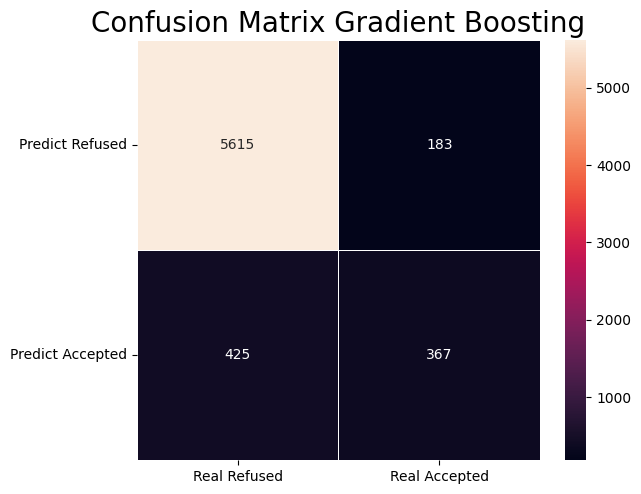

In [ ]:
# Gradient Boosting
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, grad_y_pred)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Gradient Boosting", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Real Refused', 'Real Accepted'], fontsize=10, rotation=360)
ax.set_yticklabels(['Predict Refused', 'Predict Accepted'], fontsize=10, rotation=360)
plt.show()

Confusion matrix Gradient Boosting:

True positif (terdapat 5615 yang diprediksi menolak dengan real nya menolak)

True negatif (terdapat 367 yang diprediksi menerima tetapi real nya menerima)

False positif (terdapat 183 yang diprediksi menolak tetapi real nya menerima)

False negatif (terdapat 425 yang diprediksi menerima tetapi real nya menolak)


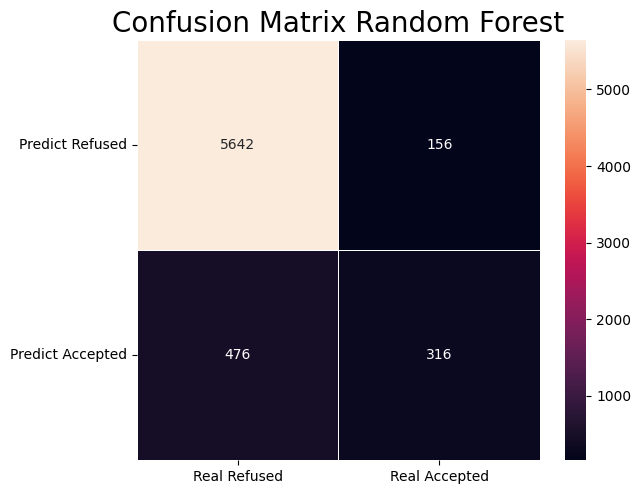

In [ ]:
# Random Forest
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, rand_y_pred)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Random Forest", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Real Refused', 'Real Accepted'], fontsize=10, rotation=360)
ax.set_yticklabels(['Predict Refused', 'Predict Accepted'], fontsize=10, rotation=360)
plt.show()

Confusion matrix Random Forest:

True positif (terdapat 5642 yang diprediksi menolak dengan real nya menolak)

True negatif (terdapat 316 yang diprediksi menerima tetapi real nya menerima)

False positif (terdapat 156 yang diprediksi menolak tetapi real nya menerima)

False negatif (terdapat 476 yang diprediksi menerima tetapi real nya menolak)


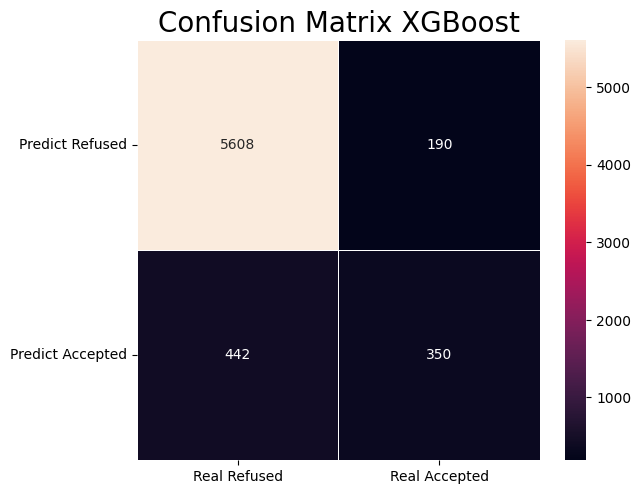

In [ ]:
# XGBoost
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, xgb_y_pred)
f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix XGBoost", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Real Refused', 'Real Accepted'], fontsize=10, rotation=360)
ax.set_yticklabels(['Predict Refused', 'Predict Accepted'], fontsize=10, rotation=360)
plt.show()

Confusion matrix XGBoost:

True positif (terdapat 5608 yang diprediksi menolak dengan real nya menolak)

True negatif (terdapat 350 yang diprediksi menerima tetapi real nya menerima)

False positif (terdapat 190 yang diprediksi menolak tetapi real nya menerima)

False negatif (terdapat 442 yang diprediksi menerima tetapi real nya menolak)


# Precision and Recall

Precision = (TP/(TP+FP))
Recall = (TP/(TP+FN))

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
# Gradient Boosting

print('Precision Score: ', precision_score(y_test, grad_y_pred))
print('Recall Score: ', recall_score(y_test, grad_y_pred))

Precision Score:  0.6672727272727272
Recall Score:  0.4633838383838384


Precision gradient boosting > model dapat menghindari kesalahan klasifikasi prediksi menolak sebanyak 66,72%

Recall gradient boosting > model dapat menghindari kesalahan klasifikasi diprediksi menerima sebanyak 46,3%


In [ ]:
# Random Forest

print('Precision Score: ', precision_score(y_test, rand_y_pred))
print('Recall Score: ', recall_score(y_test, rand_y_pred))

Precision Score:  0.6694915254237288
Recall Score:  0.398989898989899


Precision random forest > model dapat menghindari kesalahan klasifikasi diprediksi menolak sebanyak 66,94%

Recall random forest > model dapat menghindari kesalahan klasifikasi diprediksi menerima sebanyak 39,89%

In [ ]:
# XGBoost

print('Precision Score: ', precision_score(y_test, xgb_y_pred))
print('Recall Score: ', recall_score(y_test, xgb_y_pred))

Precision Score:  0.6481481481481481
Recall Score:  0.44191919191919193


Precision xgboost > model dapat menghindari kesalahan klasifikasi diprediksi menolak sebanyak 64,8

Recall xgboost > model dapat menghindari kesalahan klasifikasi diprediksi menerima sebanyak 44,19%

Berdasarkan coufision matrix untuk nilai positifnya dipilih kelas menolak sedangkan nilai negatifnya dipilih kelas menerima, maka precision lebih diutamakan dibanding recall nya karena FP yang kecil lebih baik dibandingkan banyaknya FN. Hal itu dikarenakan lebih baik memprediksi menerima tetapi realnya menolak dibandingkan diprediksi menolak tetapi realnya menerima.

# F1 Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Gadient Boosting
f1 = f1_score(y_test, grad_y_pred)

print("F1 Score Gradient Boosting:", f1)


F1 Score Gradient Boosting: 0.5469448584202682


In [ ]:
# Random Forest
f1 = f1_score(y_test, rand_y_pred)

print("F1 Score Random Forest:", f1)


F1 Score Random Forest: 0.5


In [ ]:
# XGBoost
f1 = f1_score(y_test, xgb_y_pred)

print("F1 Score XGBoost:", f1)


F1 Score XGBoost: 0.5255255255255256


F-1 score tertinggi pada model Gradient Boosting yaitu sebesar 0,54669. Hal berikut menunjukkan bahwa model dapat memprediksi semua kelas yang benar sebanyak 54,69%

#Conclusion

Berdasarkan proses data understanding, preprocesing data, eksploratory data analysis sampai dilakukan tahap pemodelan machine learning yang telah dilakukan dengan Random Forest, Gradient Boosting, dan XGBoost dapat disimpulkan bahwa:

Akurasi tertinggi ada pada model Random Forest, yaitu sebesar 92,57%. Model lebih mengutamakan precision dibanding recall, karena lebih baik False Positif yang kecil dibandingkan banyaknya False Negatif pada Confusion matrix  nya, dikarena **lebih baik** memprediksi **menerima** tetapi realnya **menolak** dibandingkan diprediksi **menerima** tetapi realnya **menolak**. Sehingga model Random Forest lebih baik dalam presision nya sebesar 66,94% dibandingkan denganmodel Gradient Boosting dan XGBoost. Namun untuk F-1 Score yaitu keselarasan nilai presision dan recall nya, model Gradient Boosting lebih baik dibandingkan model Random Forest dan XGBoost


Sehingga model Random Forest dapat menjadi pilihan terbaik dari segi akurasi dan nilai precision nya dalam klasifikasi kriteria nasabah Bank yang memilih untuk mengambil deposito berjangka. Maka model Random Forest dapat **meningkatkan keakuratan** dalam **menilai dan mengelola kampanye marketing**, sehingga pihak Bank dapat mengoptimalkan keputusan bisnis mereka dalam efisiensi kinerja kampanye marketing supaya tepat memilih nasabah yang akan ditawarkan untuk deposito berjangka.